In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import tensorflow as tf
from tensorflow import keras

Training data shape: (60000, 28, 28)
Testing data shape: (10000, 28, 28)


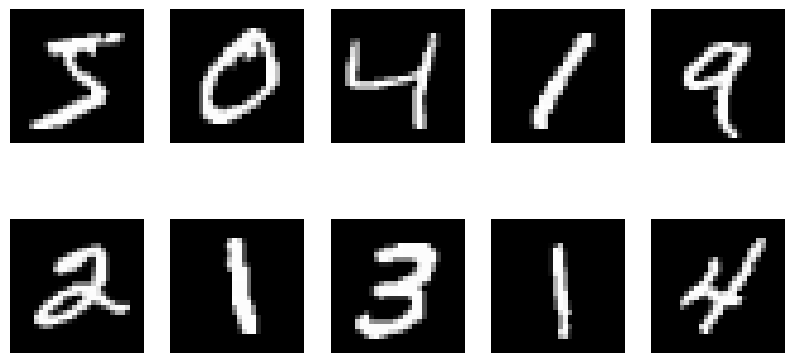

In [3]:
# Load dataset from Keras
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Print dataset shape
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

# Display some images from the dataset
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.axis('off')
plt.show()

## Preprocess Data for SVM and KNN

In [4]:
# Flatten images from 28x28 to 784 features
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Normalize pixel values (0-255) to range (0-1)
X_train_flat = X_train_flat / 255.0
X_test_flat = X_test_flat / 255.0

# Split training data into train and validation sets
X_train_svm, X_val_svm, y_train_svm, y_val_svm = train_test_split(X_train_flat, y_train, test_size=0.2, random_state=42)

## Train and Evaluate SVM Model

In [5]:
# Train SVM classifier with RBF kernel
svm_model = SVC(kernel='rbf')
svm_model.fit(X_train_svm, y_train_svm)

# Predict on test set
y_pred_svm = svm_model.predict(X_test_flat)

# Evaluate SVM model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", accuracy_svm)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.9777
Confusion Matrix:
 [[ 971    0    2    0    0    2    2    1    2    0]
 [   0 1126    3    1    0    1    1    1    2    0]
 [   5    2 1008    2    1    0    1    8    5    0]
 [   0    0    3  991    0    2    0    7    6    1]
 [   0    0    5    0  961    0    2    0    1   13]
 [   2    0    0    9    0  873    3    1    3    1]
 [   6    2    1    0    2    4  939    0    4    0]
 [   1    9   13    2    1    0    0  991    1   10]
 [   3    0    2    6    2    2    2    3  952    2]
 [   4    4    1    5   13    1    1    9    6  965]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.98      0.97      1032
           3       0.98      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.98      0.98       892
           6       0.99   

## Train and Evaluate KNN Model

In [6]:
# Train KNN classifier with 5 neighbors
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_svm, y_train_svm)

# Predict on test set
y_pred_knn = knn_model.predict(X_test_flat)

# Evaluate KNN model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("KNN Accuracy:", accuracy_knn)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))

KNN Accuracy: 0.967
Confusion Matrix:
 [[ 974    1    1    0    0    1    2    1    0    0]
 [   0 1131    2    1    0    0    1    0    0    0]
 [  12   10  983    2    1    0    1   17    6    0]
 [   0    3    3  976    1   13    1    5    4    4]
 [   2    7    0    0  942    0    4    1    1   25]
 [   4    0    0   11    2  864    6    1    1    3]
 [   5    3    0    0    3    3  944    0    0    0]
 [   0   23    4    0    3    0    0  988    0   10]
 [   8    4    4   16    6   15    2    8  907    4]
 [   5    7    3    5    9    5    1   11    2  961]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98       980
           1       0.95      1.00      0.97      1135
           2       0.98      0.95      0.97      1032
           3       0.97      0.97      0.97      1010
           4       0.97      0.96      0.97       982
           5       0.96      0.97      0.96       892
           6       0.98    

## Preprocess Data for Neural Network

In [7]:
# Normalize images for Neural Network
X_train_nn = X_train / 255.0
X_test_nn = X_test / 255.0

## Build and Train Neural Network Model

In [8]:
# Define neural network model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # Flatten 28x28 images
    keras.layers.Dense(128, activation='relu'),  # First hidden layer
    keras.layers.Dense(64, activation='relu'),   # Second hidden layer
    keras.layers.Dense(10, activation='softmax') # Output layer (10 classes)
])

# Compile model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train neural network for 10 epochs
history = model.fit(X_train_nn, y_train, epochs=10, validation_data=(X_test_nn, y_test))

C:\Users\Abhishek\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.8788 - loss: 0.4127 - val_accuracy: 0.9669 - val_loss: 0.1110
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9669 - loss: 0.1076 - val_accuracy: 0.9686 - val_loss: 0.1008
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9783 - loss: 0.0707 - val_accuracy: 0.9678 - val_loss: 0.1022
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9850 - loss: 0.0498 - val_accuracy: 0.9766 - val_loss: 0.0772
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - accuracy: 0.9883 - loss: 0.0370 - val_accuracy: 0.9729 - val_loss: 0.0959
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9905 - loss: 0.0325 - val_accuracy: 0.9744 - val_loss: 0.0910
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.9917 - loss: 0.0273 - val_accuracy: 0.9767 - val_loss: 0.0849
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9933 - loss: 0

## Evaluate Neural Network

In [9]:
# Evaluate model on test set
test_loss, test_acc = model.evaluate(X_test_nn, y_test)
print("\nNeural Network Accuracy:", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9757 - loss: 0.1035

Neural Network Accuracy: 0.9783999919891357


## Plot Training Accuracy Over Epochs

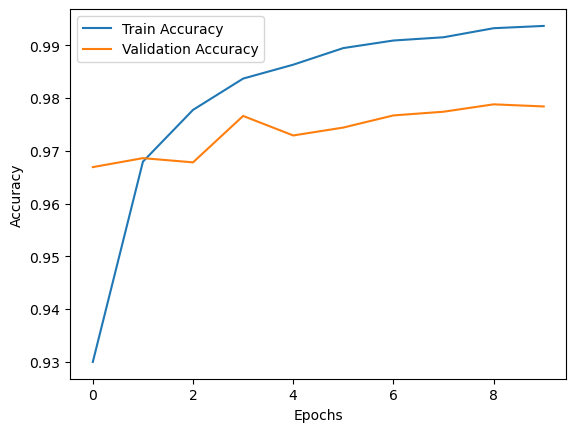

In [10]:
# Plot accuracy over epochs
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Compare Model Performance

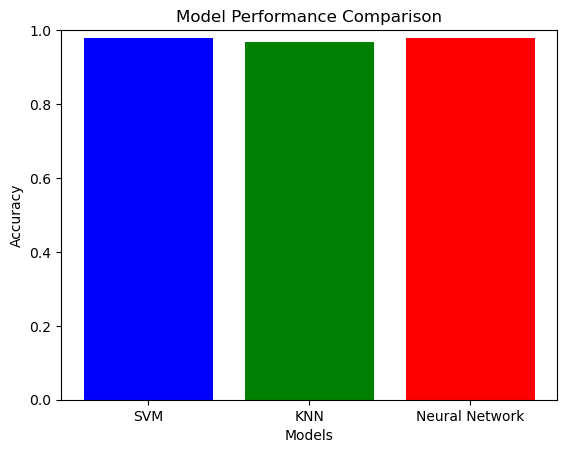

Model Performance Comparison: SVM: 0.9777 KNN: 0.967 Neural Network: 0.9783999919891357


In [12]:
# Compare SVM, KNN, and Neural Network accuracy
models = ['SVM', 'KNN', 'Neural Network']
accuracies = [accuracy_svm, accuracy_knn, test_acc]

# Plot accuracy comparison
plt.bar(models, accuracies, color=['blue', 'green', 'red'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Performance Comparison')
plt.ylim(0, 1)
plt.show()

print("Model Performance Comparison:", "SVM:",accuracy_svm, "KNN:",accuracy_knn, "Neural Network:",test_acc)